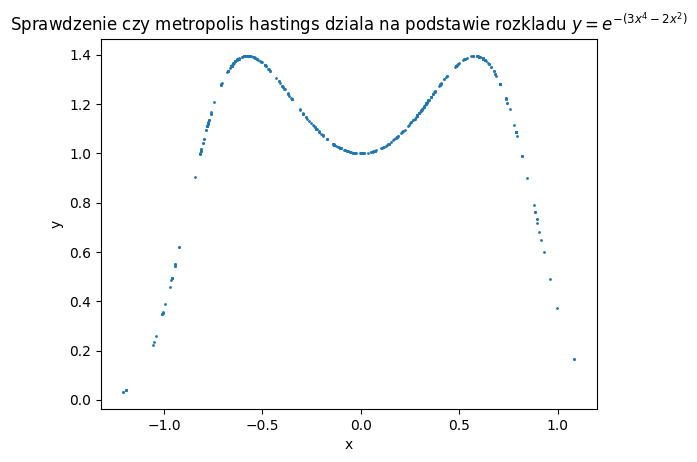

In [39]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import sys
import torch # na razie tylko metropolis

xs = np.random.random(size=(100,))
ys = stats.norm.pdf(xs, loc=0, scale=1) # rozkład normalny ciekawe czy zagdniemy? 

# metropolis hastings, chcemy dostać te stałe rozkładu normalnego
def jakis_rozklad(x):
    return np.exp(-(3 * x**4 - 2 * x**2))

def metropolis_hastings_probing(distribution: callable, numbers: int):
    x_actual = 0.1 # doesn't matter
    xs = np.zeros(numbers)
    ys = np.zeros(numbers)
    added = 0

    while added < numbers:
        x_proposed = x_actual + np.random.normal(loc=0, scale=1) # losową wartość do x-a dodajemy - no teraz zaczyna ta metoda mieć sens
        ys[added] = distribution(x_proposed)
        prob_adding = ys[added] / distribution(x_actual) # te rozklady nie zaleza od poprzedniego punkut

        if np.random.uniform(low=0., high=1.) <= prob_adding:
            x_actual = x_proposed
        else:
            ys[added] = ys[added-1]
        xs[added] = x_actual
        added += 1

    return xs, ys

xs, ys = metropolis_hastings_probing(jakis_rozklad, 500)

plt.title(r'Sprawdzenie czy metropolis hastings dziala na podstawie rozkladu $y = e^{-(3x^4 - 2x^2)}$')
plt.scatter(xs, ys, s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

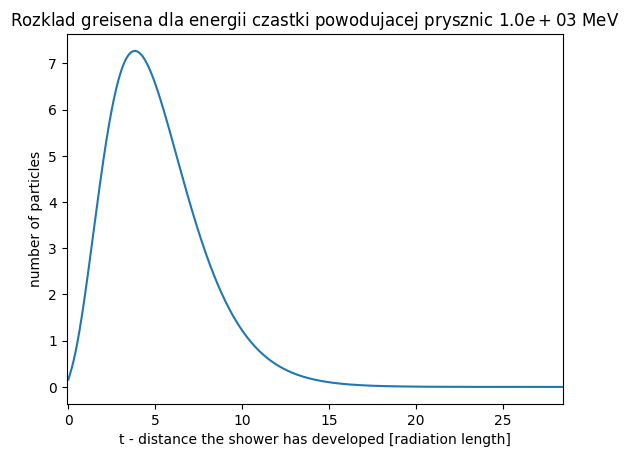

In [65]:
"""
    Zwykly greisen
    Ne(t)= 0.31 / sqrt(ln(E0/Ec)) *  exp[t( 1 - 3/2 ln(s))]
    
    t - distance the shower has developed [radiation length]
    E0 - primary energy (of a particle?)
    Ec - critical energy (of material?)
    Ne(t) - number of particles in electromagnetic shower
    s - shower age, s = 3t / (t + 2 * ln(E0/Ec))
"""

E0 = 1e3 # MeV
Ec = 21.8 # MeV - dla zelaza 
beta0 = np.log(E0/Ec) # nie znam znaczenia tej zmiennej
X0 = 1.757 # cm https://pdg.web.cern.ch/pdg/2020/AtomicNuclearProperties/HTML/iron_Fe.html

def greisen(t: float, beta0: float=beta0): # mozna ndarraye wrzucac
    s = 3*t / (t + 2*beta0)
    return 0.31 / np.sqrt(beta0) * np.exp(t * (1 - 1.5 * np.log(s)))

t_prob = np.linspace(1e-10, 50, num=10_000) / X0 # jak daleko przeszedl dzielone przez dlugosc radiacyjna dla zelaza
values = greisen(t_prob)

plt.title(rf'Rozklad greisena dla energii czastki powodujacej prysznic ${E0:.1e}$ MeV')
plt.plot(t_prob, values)
plt.xlabel('t - distance the shower has developed [radiation length]')
plt.ylabel('number of particles')
plt.xlim(-0.1, np.max(t_prob))
plt.savefig('Greisen.jpg')

/tmp/ipykernel_8973/3121020899.py:19: RuntimeWarning: invalid value encountered in log
  return 0.31 / np.sqrt(beta0) * np.exp(t * (1 - 1.5 * np.log(s)))


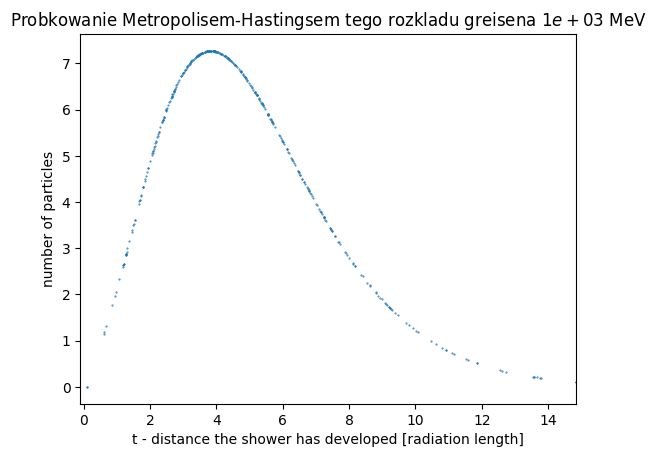

In [68]:
xs, ys = metropolis_hastings_probing(greisen, 400)

plt.title(rf'Probkowanie Metropolisem-Hastingsem tego rozkladu greisena ${E0:.0e}$ MeV')
plt.scatter(xs, ys, s=0.2)
plt.xlabel('t - distance the shower has developed [radiation length]')
plt.ylabel('number of particles')
plt.xlim(-0.1, np.max(xs))
plt.savefig('Metropolis - hastings dla greisena')